<a href="https://colab.research.google.com/github/bbulla/Airplane-Crashes/blob/main/Regresi%C3%B3n_Lineal_Simple_Bulla%2BDiaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Método de regresión (Lineal simple)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
import sqlite3
import re
%matplotlib inline
from datetime import datetime, timedelta
train=pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')
test=pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')


In [ ]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv', parse_dates={"DATETIME":["Date"]}, infer_datetime_format=True, dayfirst=False)

In [ ]:
df

,DATETIME,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,2019-04-16,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p..."
4963,2019-05-05,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...
4964,2019-05-05,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...
4965,2019-06-03,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.


In [ ]:
df.shape

(4967, 17)

purificación de datos

In [ ]:
df.drop(['Flight #', 'Registration', 'cn/ln', 'Ground', 'Summary', 'Time', 'Aboard Passangers', 'Aboard Crew', 'Fatalities Passangers', 'Fatalities Crew'], axis=1)

,DATETIME,Location,Operator,Route,AC Type,Aboard,Fatalities
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0
1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,1.0
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0
3,1913-08-06,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0
4,1913-09-09,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0
...,...,...,...,...,...,...,...
4962,2019-04-16,"Puerto Montt, Chile",Archipelagos Service Aereos,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,6.0,6.0
4963,2019-05-05,"Near Monclava, Mexico",TVPX Aircraft Solutions,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,13.0,13.0
4964,2019-05-05,"Moscow, Russia",Aeroflot Russian International Airlines,Moscow - Murmansk,Sukhoi Superjet-100-95B,78.0,41.0
4965,2019-06-03,"Near Lipo, India",Military - Indian Air Force,Jorhat-Rowriah - Mechuka,Antonov An-32,13.0,13.0


In [ ]:
#Analisis estadistico basico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Aboard,4949.0,31.088301,45.438282,0.0,7.0,16.0,35.0,644.0
Aboard Passangers,4738.0,26.898691,44.010591,0.0,3.0,12.0,30.0,614.0
Aboard Crew,4741.0,4.479646,3.489021,0.0,2.0,4.0,6.0,61.0
Fatalities,4959.0,22.338173,35.026176,0.0,4.0,11.0,25.0,583.0
Fatalities Passangers,4725.0,19.017566,34.114849,0.0,1.0,8.0,21.0,560.0
Fatalities Crew,4726.0,3.579348,3.170223,0.0,2.0,3.0,5.0,46.0
Ground,4926.0,1.728177,55.708966,0.0,0.0,0.0,0.0,2750.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATETIME               4967 non-null   datetime64[ns]
 1   Time                   3457 non-null   object        
 2   Location               4963 non-null   object        
 3   Operator               4957 non-null   object        
 4   Flight #               1315 non-null   object        
 5   Route                  4193 non-null   object        
 6   AC Type                4952 non-null   object        
 7   Registration           4694 non-null   object        
 8   cn/ln                  4299 non-null   object        
 9   Aboard                 4949 non-null   float64       
 10  Aboard Passangers      4738 non-null   float64       
 11  Aboard Crew            4741 non-null   float64       
 12  Fatalities             4959 non-null   float64       
 13  Fat

In [ ]:
df

,DATETIME,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,2019-04-16,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p..."
4963,2019-05-05,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...
4964,2019-05-05,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...
4965,2019-06-03,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.


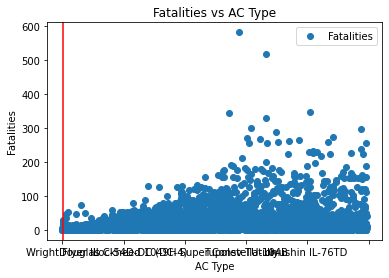

In [ ]:
#Ploteamos el dataset
df.plot(x='AC Type', y='Fatalities', style="o")
plt.title('Fatalities vs AC Type')
plt.xlabel('AC Type')
plt.ylabel('Fatalities')
plt.axvline(x=5,color='r')
plt.show()

In [ ]:
#1) Preparacion de datos
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
#2) Empezamos a crear nuestro modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 3) Entrenando el modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

TypeError: ignored

In [ ]:
#Recuperamos la intersección
print(regressor.intercept_)

In [ ]:
#La pendiente
print(regressor.coef_)

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df